# Springboard Data Science Career Track Unit 4 Challenge - Tier 3 Complete

## Objectives
Hey! Great job getting through those challenging DataCamp courses. You're learning a lot in a short span of time. 

In this notebook, you're going to apply the skills you've been learning, bridging the gap between the controlled environment of DataCamp and the *slightly* messier work that data scientists do with actual datasets!

Here’s the mystery we’re going to solve: ***which boroughs of London have seen the greatest increase in housing prices, on average, over the last two decades?***


A borough is just a fancy word for district. You may be familiar with the five boroughs of New York… well, there are 32 boroughs within Greater London [(here's some info for the curious)](https://en.wikipedia.org/wiki/London_boroughs). Some of them are more desirable areas to live in, and the data will reflect that with a greater rise in housing prices.

***This is the Tier 3 notebook, which means it's not filled in at all: we'll just give you the skeleton of a project, the brief and the data. It's up to you to play around with it and see what you can find out! Good luck! If you struggle, feel free to look at easier tiers for help; but try to dip in and out of them, as the more independent work you do, the better it is for your learning!***

This challenge will make use of only what you learned in the following DataCamp courses: 
- Prework courses (Introduction to Python for Data Science, Intermediate Python for Data Science)
- Data Types for Data Science
- Python Data Science Toolbox (Part One) 
- pandas Foundations
- Manipulating DataFrames with pandas
- Merging DataFrames with pandas

Of the tools, techniques and concepts in the above DataCamp courses, this challenge should require the application of the following: 
- **pandas**
    - **data ingestion and inspection** (pandas Foundations, Module One) 
    - **exploratory data analysis** (pandas Foundations, Module Two)
    - **tidying and cleaning** (Manipulating DataFrames with pandas, Module Three) 
    - **transforming DataFrames** (Manipulating DataFrames with pandas, Module One)
    - **subsetting DataFrames with lists** (Manipulating DataFrames with pandas, Module One) 
    - **filtering DataFrames** (Manipulating DataFrames with pandas, Module One) 
    - **grouping data** (Manipulating DataFrames with pandas, Module Four) 
    - **melting data** (Manipulating DataFrames with pandas, Module Three) 
    - **advanced indexing** (Manipulating DataFrames with pandas, Module Four) 
- **matplotlib** (Intermediate Python for Data Science, Module One)
- **fundamental data types** (Data Types for Data Science, Module One) 
- **dictionaries** (Intermediate Python for Data Science, Module Two)
- **handling dates and times** (Data Types for Data Science, Module Four)
- **function definition** (Python Data Science Toolbox - Part One, Module One)
- **default arguments, variable length, and scope** (Python Data Science Toolbox - Part One, Module Two) 
- **lambda functions and error handling** (Python Data Science Toolbox - Part One, Module Four) 

## The Data Science Pipeline

This is Tier Three, so we'll get you started. But after that, it's all in your hands! When you feel done with your investigations, look back over what you've accomplished, and prepare a quick presentation of your findings for the next mentor meeting. 

Data Science is magical. In this case study, you'll get to apply some complex machine learning algorithms. But as  [David Spiegelhalter](https://www.youtube.com/watch?v=oUs1uvsz0Ok) reminds us, there is no substitute for simply **taking a really, really good look at the data.** Sometimes, this is all we need to answer our question.

Data Science projects generally adhere to the four stages of Data Science Pipeline:
1. Sourcing and loading 
2. Cleaning, transforming, and visualizing 
3. Modeling 
4. Evaluating and concluding 


### 1. Sourcing and Loading 

Any Data Science project kicks off by importing  ***pandas***. The documentation of this wonderful library can be found [here](https://pandas.pydata.org/). As you've seen, pandas is conveniently connected to the [Numpy](http://www.numpy.org/) and [Matplotlib](https://matplotlib.org/) libraries. 

***Hint:*** This part of the data science pipeline will test those skills you acquired in the pandas Foundations course, Module One. 

#### 1.1. Importing Libraries

In [6]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
from matplotlib import pyplot as plt

# for http error
import requests
from io import BytesIO


#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [12]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices= "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# for request issue
# Set headers to mimic a browser
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Make the request
response = requests.get(url_LondonHousePrices, headers=headers)

# Raise error if failed
response.raise_for_status()

# Load Excel data from memory buffer
excel_data = BytesIO(response.content)

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(excel_data, sheet_name='Average price', index_col= None)
#print(properties.head())

  Unnamed: 0 City of London Barking & Dagenham     Barnet     Bexley  \
0        NaT      E09000001          E09000002  E09000003  E09000004   
1 1995-01-01          90347              51870      98948      64956   
2 1995-02-01          81213              52513      98848      64786   
3 1995-03-01          78168              52701      97848      64366   
4 1995-04-01          76172              54618      96273      64276   

       Brent    Bromley     Camden    Croydon     Ealing  ... NORTH WEST  \
0  E09000005  E09000006  E09000007  E09000008  E09000009  ...  E12000002   
1      76880      83082     119775      70118      85469  ...      40907   
2      77651      83068     118365      69908      86551  ...      40877   
3      77644      82856     119131      69666      87067  ...      41351   
4      78668      82525     118948      69562      87933  ...      41195   

  YORKS & THE HUMBER EAST MIDLANDS WEST MIDLANDS EAST OF ENGLAND     LONDON  \
0          E12000003     E12000

### 2. Cleaning, transforming, and visualizing
This second stage is arguably the most important part of any Data Science project. The first thing to do is take a proper look at the data. Cleaning forms the majority of this stage, and can be done both before or after Transformation.

The end goal of data cleaning is to have tidy data. When data is tidy: 

1. Each variable has a column.
2. Each observation forms a row.

Keep the end goal in mind as you move through this process, every step will take you closer. 



***Hint:*** This part of the data science pipeline should test those skills you acquired in: 
- Intermediate Python for data science, all modules.
- pandas Foundations, all modules. 
- Manipulating DataFrames with pandas, all modules.
- Data Types for Data Science, Module Four.
- Python Data Science Toolbox - Part One, all modules

**2.1. Exploring your data** 

Think about your pandas functions for checking out a dataframe. 

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [141]:
# step1: transposing dataset
properties_T = properties.T 
# print(properties_T.head())

# step2: assign the 1st row as the new column and remove the old 1st row
# resolve the warning: FutureWarning: Dtype inference on a pandas object 
new_columns = properties_T.iloc[0].infer_objects()
properties_T.columns = new_columns
#print(properties_T.columns)
properties_T = properties_T.iloc[1:]
# print(properties_T.head())
# print(properties_T.index)

# step3: reset index
properties_T = properties_T.reset_index()
# print(properties_T.head())
# print(properties_T.index)
# print(properties_T.columns)

# step4: remove NaT column - Borough code
if pd.NaT in properties_T.columns:
    properties_T = properties_T.drop(columns=[pd.NaT])
# print(properties_T.head())

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [143]:
# step5: reset index to "Borough"
properties_T = properties_T.rename(columns={'index' : 'Borough'})
#print(properties_T.head())

Unnamed: 0             Borough 1995-01-01 00:00:00 1995-02-01 00:00:00  \
0               City of London               90347               81213   
1           Barking & Dagenham               51870               52513   
2                       Barnet               98948               98848   
3                       Bexley               64956               64786   
4                        Brent               76880               77651   

Unnamed: 0 1995-03-01 00:00:00 1995-04-01 00:00:00 1995-05-01 00:00:00  \
0                        78168               76172               83392   
1                        52701               54618               54524   
2                        97848               96273               95737   
3                        64366               64276               63995   
4                        77644               78668               79464   

Unnamed: 0 1995-06-01 00:00:00 1995-07-01 00:00:00 1995-08-01 00:00:00  \
0                        93757      

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [153]:
# step6: reshape data
tidy_properties = pd.melt(properties_T, id_vars=['Borough'], var_name='Date', value_name='AveragePrice')
#print(tidy_properties.head())

              Borough                 Date AveragePrice
0      City of London  1995-01-01 00:00:00        90347
1  Barking & Dagenham  1995-01-01 00:00:00        51870
2              Barnet  1995-01-01 00:00:00        98948
3              Bexley  1995-01-01 00:00:00        64956
4               Brent  1995-01-01 00:00:00        76880


Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [161]:
# step7: check types
print(tidy_properties.dtypes)

# step8: convert object to float for tidy_properties['AveragePrice']
tidy_properties['AveragePrice'] = pd.to_numeric(tidy_properties['AveragePrice'], errors='coerce')
#print(tidy_properties.dtypes)

Borough          object
Date             object
AveragePrice    float64
dtype: object
Borough          object
Date             object
AveragePrice    float64
dtype: object


**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [195]:
# print(tidy_properties)
# step1: check if row-level consistency
print(tidy_properties.count())

# step2: check unique Borough
print(tidy_properties['Borough'].unique())

# step3: find if there is null or NaN in Borough
print(tidy_properties['Borough'].isna().sum())

# no need to remove null value
# step4: drop rows where Borough is null
# tidy_properties = tidy_properties[tidy_properties['Borough'].notna()]
# print(tidy_properties)

# step4: remove non-Borough rows
official_boroughs = [
    'Barking & Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden',
    'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
    'Hammersmith & Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon',
    'Hounslow', 'Islington', 'Kensington & Chelsea', 'Kingston upon Thames',
    'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge',
    'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
    'Waltham Forest', 'Wandsworth', 'Westminster'
]
tidy_properties = tidy_properties[tidy_properties['Borough'].isin(official_boroughs)]
# print(len(tidy_properties['Borough'].unique()))

# step5: drop rows with missing AveragePrice
tidy_properties = tidy_properties[tidy_properties['AveragePrice'].notna()]

# step6: confirm the data is clean
print(tidy_properties['Borough'].unique())
print(tidy_properties.count())

Borough         11616
Date            11616
AveragePrice    11616
dtype: int64
['Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney' 'Hammersmith & Fulham'
 'Haringey' 'Harrow' 'Havering' 'Hillingdon' 'Hounslow' 'Islington'
 'Kensington & Chelsea' 'Kingston upon Thames' 'Lambeth' 'Lewisham'
 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames' 'Southwark' 'Sutton'
 'Tower Hamlets' 'Waltham Forest' 'Wandsworth' 'Westminster']
0
['Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney' 'Hammersmith & Fulham'
 'Haringey' 'Harrow' 'Havering' 'Hillingdon' 'Hounslow' 'Islington'
 'Kensington & Chelsea' 'Kingston upon Thames' 'Lambeth' 'Lewisham'
 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames' 'Southwark' 'Sutton'
 'Tower Hamlets' 'Waltham Forest' 'Wandsworth' 'Westminster']
Borough         11616
Date            11616
AveragePrice    11616
dtype: int64


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

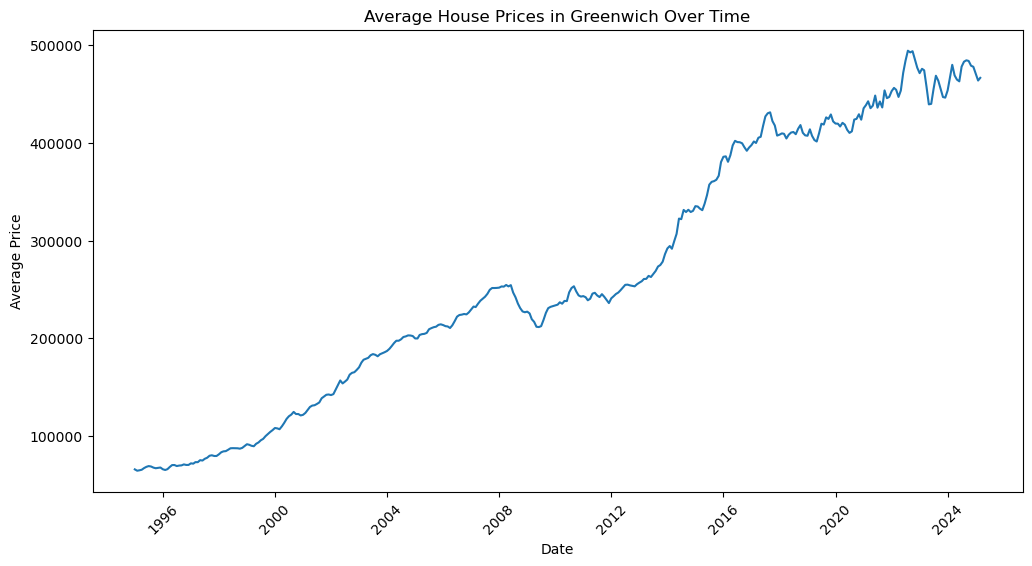

In [215]:
# step1: subset data - filter for Greenwich
greenwich_data = tidy_properties[tidy_properties['Borough'] == 'Greenwich']
#print(greenwich_data)

plt.figure(figsize=(12, 6))
plt.plot(greenwich_data['Date'], greenwich_data['AveragePrice'])
plt.title('Average House Prices in Greenwich Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
# plt.tight_layout()
plt.show()

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

                Borough  Year  AveragePrice
0    Barking & Dagenham  1995  5.326542e+04
1    Barking & Dagenham  1996  5.316267e+04
2    Barking & Dagenham  1997  5.753758e+04
3    Barking & Dagenham  1998  6.196967e+04
4    Barking & Dagenham  1999  6.714533e+04
..                  ...   ...           ...
987         Westminster  2021  1.083784e+06
988         Westminster  2022  1.155571e+06
989         Westminster  2023  1.148412e+06
990         Westminster  2024  1.071103e+06
991         Westminster  2025  9.357060e+05

[992 rows x 3 columns]


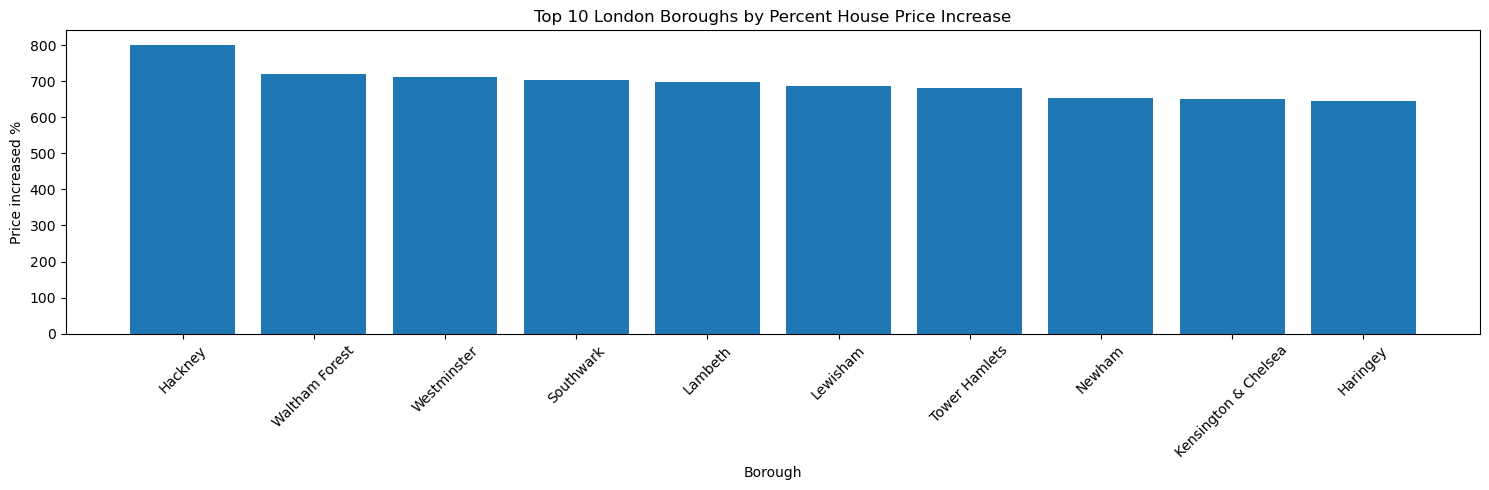

In [432]:
# sort values by Borough and the date
# print(tidy_properties.sort_values(by=['Borough', 'Date']))

# step1: extract year
tidy_properties['Year'] = tidy_properties['Date'].apply(lambda x: x.year )
# print(tidy_properties.head())

# step2: group by Borough and year
borough_yearly = tidy_properties.groupby(['Borough', 'Year'])['AveragePrice'].agg(func=['mean']).reset_index()
#print(borough_yearly)

# step3: rename mean back to AveragePrice
borough_yearly = borough_yearly.rename(columns={'mean' : 'AveragePrice'})
# print(borough_yearly)
# print(borough_yearly.sort_values(by='AveragePrice'))

# step3: pivot dataframe
price_pivot = borough_yearly.pivot(index='Borough', columns='Year', values='AveragePrice')
#print(price_pivot.head())

# step4: check if there is null value
# print(price_pivot.isna().sum())

# step5: find the highest price and lowest price
price_pivot['MaxPrice'] = price_pivot.max(axis=1)
price_pivot['MinPrice'] = price_pivot.min(axis=1)
#print(price_pivot.head())

# step6: calculate the increse and percentage
price_pivot['Increase'] = price_pivot['MaxPrice'] - price_pivot['MinPrice']
price_pivot['PercentIncreased'] = price_pivot['Increase'] / price_pivot['MinPrice'] * 100
#print(price_pivot.head())

# step7: sort by PercentIncreased to find which borough has greatest house price increase
price_sorted = price_pivot.sort_values(by='PercentIncreased', ascending=False)

# step8: visulization - top 10 average price increased
top_10 = price_sorted.head(10);
plt.figure(figsize=(15,5))
plt.bar(top_10.index, top_10['PercentIncreased'])
plt.xlabel('Borough')
plt.xticks(rotation=45)
plt.ylabel('Price increased %')
plt.title('Top 10 London Boroughs by Percent House Price Increase')
plt.tight_layout()



In [478]:
# find the max average house price 
# print(tidy_properties)
average_price_by_borough = tidy_properties.groupby('Borough')['AveragePrice'].mean().reset_index()
average_price_by_borough = average_price_by_borough.sort_values(by='AveragePrice')
most_expensive_borough = average_price_by_borough['AveragePrice'].idxmax()
print(average_price_by_borough.loc[most_expensive_borough])


Borough         Kensington & Chelsea
AveragePrice           913622.884298
Name: 18, dtype: object


**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

<Figure size 1000x1200 with 0 Axes>

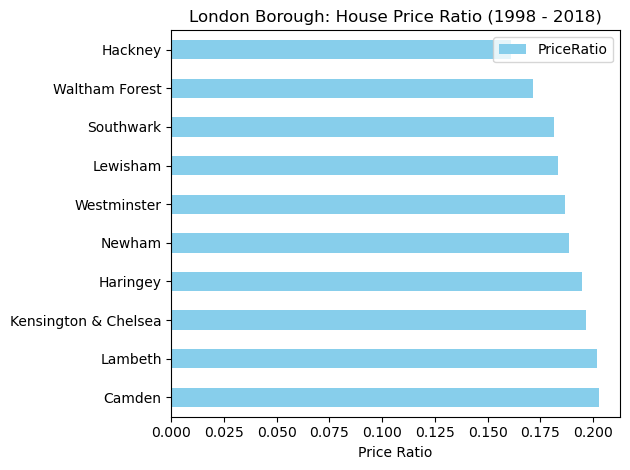

In [410]:
# step1: create create_price_ratio function
def create_price_ratio(borough):
    price_1998 = price_pivot.loc[borough, 1998]
    price_2018 = price_pivot.loc[borough, 2018]

    if price_1998 != 0:
        return price_1998 / price_2018
    else:
        return None

# step2: get price ratio for each Borough
ratio = {}
for borough in price_pivot.index:
    price_ratio = create_price_ratio(borough)
    ratio[borough] = price_ratio

# step3: convert ratio to data frame
ratio_df = pd.DataFrame.from_dict(ratio, orient='index', columns=['PriceRatio'])
ratios_df_sorted = ratio_df.sort_values(by='PriceRatio', ascending=True)
#print(ratios_df_sorted)

# step4: visulization
ratio_10 = ratios_df_sorted.head(10)
plt.figure(figsize=(10, 12))
ratio_10.plot(kind='barh', color='skyblue')
plt.title("London Borough: House Price Ratio (1998 - 2018)")
plt.xlabel("Price Ratio")
plt.gca().invert_yaxis()
plt.tight_layout()

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 

In [ ]:
1. Hackney saw the highest price increased from 1998 to 2018
2. Hackney also has the higest price growth which is aroun 8x more than its historical lows from 1995 to 2025 